# Network and Sentiment Analysis of Tweets (Cavaliers vs. Warriors NBA Final 2018)




---


Through this project, we intend to perform network analysis and sentiment analysis on the tweets (textual data). We aim to perform lexical analysis to evaluate the emotions in each tweet, along with generating networks to investigate the social structure through the use of graph theory. While the sentiment analysis will help us understand the sentiments (both positive and negative) and also explore the specific emotions of the audience, the network analysis helps us in generating and visualizing the retweet network graph from the captured tweets. Both sentiment analysis and network analysis have proven to be very useful in decision-making. These analyses will make it easy for anyone of interest to study and determine the support each team gets and also likely to get in the future as the events progress. 

**Importing libraries**

In [1]:
import pandas as pd
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import json
import csv
import operator

**Reading data**

In [2]:
df = pd.read_csv(r'../data/TweetsNBA.csv', encoding = "ISO-8859-1");

In [3]:
df.shape

(51425, 44)

In [4]:
df.head()

,Unnamed: 0,text,retweet_count,favorite_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,...,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url
0,1,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,1004531741216989191,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Ja comecou e eu no onibus https://t.co/wPgRLw...,0,0,False,False,1004531741422481409,NaN,"<a href=""http://twitter.com/download/android"" ...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/NBA/status/100447552030887...,https://t.co/wPgRLwdg1O
2,3,lets go Cavs\r\n#WhateverItTakes \r\n#NBAFinals,0,0,False,False,1004531741954981888,NaN,"<a href=""http://twitter.com/download/android"" ...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,1004531743410573312,NaN,"<a href=""http://twitter.com/download/android"" ...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RT @NBA: Count down @StephenCurry30's TOP 5 t...,0,0,False,False,1004531743272194048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Unnamed: 0,retweet_count,favorite_count,id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,listed_count,user_id_str,statuses_count,followers_count,favourites_count,time_zone,utc_offset,friends_count,place_lat,place_lon,lat,lon
count,51425.000000,51425.0,51425.0,5.142500e+04,4.580000e+02,1.058000e+03,51425.000000,5.142500e+04,5.142500e+04,5.142500e+04,5.142500e+04,0.0,0.0,51425.000000,1664.000000,1664.000000,11.000000,11.000000
mean,25713.000000,0.0,0.0,1.004537e+18,1.002068e+18,8.284585e+16,53.655226,1.846986e+17,2.714620e+04,1.527766e+04,1.132881e+04,NaN,NaN,867.862440,26.847371,-55.789350,25.812217,-70.779955
std,14845.263133,0.0,0.0,3.190923e+12,4.681573e+16,2.529026e+17,779.539123,3.587420e+17,6.439230e+04,4.109777e+05,2.915622e+04,NaN,NaN,5460.407658,22.416988,62.855413,17.936799,65.927399
min,1.000000,0.0,0.0,1.004532e+18,5.153016e+15,2.461030e+05,0.000000,3.629000e+03,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000,-39.290459,-157.937058,-23.560609,-122.310000
25%,12857.000000,0.0,0.0,1.004534e+18,1.004532e+18,2.308340e+07,0.000000,2.804389e+08,2.178000e+03,1.480000e+02,7.510000e+02,NaN,NaN,194.000000,23.895049,-89.191620,24.660820,-91.068260
50%,25713.000000,0.0,0.0,1.004536e+18,1.004535e+18,1.159812e+08,2.000000,1.109339e+09,8.516000e+03,3.650000e+02,3.240000e+03,NaN,NaN,385.000000,35.466283,-79.980689,35.174000,-89.857100
75%,38569.000000,0.0,0.0,1.004539e+18,1.004538e+18,1.601172e+09,10.000000,3.584163e+09,2.651700e+04,8.510000e+02,1.067700e+04,NaN,NaN,771.000000,40.816418,-46.595546,35.174000,-89.857100
max,51425.000000,0.0,0.0,1.004543e+18,1.004543e+18,1.004527e+18,48677.000000,1.004542e+18,2.748293e+06,2.781457e+07,1.036221e+06,NaN,NaN,742559.000000,64.893057,153.369361,37.550000,120.989695


**Exploratory Data Analysis (EDA)**

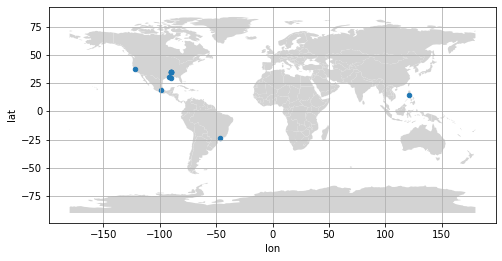

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)

df.plot(x="lon", y="lat", kind="scatter", colormap="YlOrRd",ax=ax)

ax.grid()
plt.show()

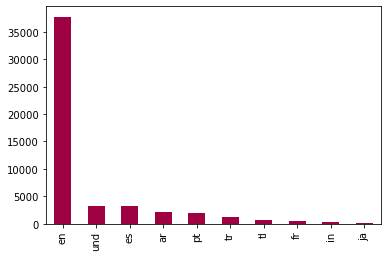

In [7]:
df['lang'].value_counts().head(10).plot(kind='bar', colormap="Spectral");

In [8]:
df_filtered_lang = df[df["lang"] == "en"];
print("No of english language tweets :", df_filtered_lang.shape)

No of english language tweets : (37756, 44)


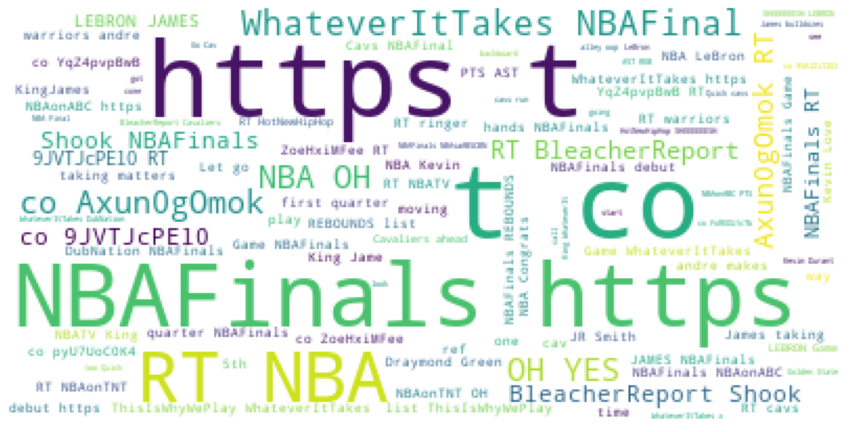

In [9]:
spam_array = ' '.join(list(df_filtered_lang['text']))

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(spam_array)
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Network analysis

In [10]:
with open(r'../data/Tweets.json') as data_file:    
    data = json.load(data_file)  

networkx_data = pd.json_normalize(data)

In [11]:
networkx_data.shape

(11039, 371)

#### Extracting nodes 

In [12]:
nodes = list(networkx_data["id_str"]);

#### Extracting edges

In [13]:
edges = list(networkx_data["retweeted_status.id_str"]);

#### Converting extracted nodes and edges to a dataframe

In [14]:
network_df = pd.DataFrame({'source': nodes, 'target': edges});
network_df = network_df.dropna()
network_df = network_df.reset_index()

In [15]:
network_df.shape

(6087, 3)

In [16]:
network_df.to_csv(r"../data/networkxdatagephi.csv",  sep=' ', columns = ["source", "target"], index=False)

In [18]:
graph = nx.read_edgelist(r"../data/networkxdatagephi.csv", create_using=nx.Graph(),nodetype=int);


In [19]:
number_of_nodes = graph.number_of_nodes();
print("Number of nodes :", number_of_nodes);

Number of nodes : 6693


In [20]:
number_of_edges = graph.number_of_edges();
print("Number of edges :", number_of_edges);

Number of edges : 6084


#### Number of connected components

A connected component of an undirected graph is a subgraph in which each pair of nodes is connected with each other via a path.

In [21]:
connected_components = nx.number_connected_components(graph);
print("Number of connected components :", connected_components);

Number of connected components : 609


#### Network density

The network density is defined as the ratio of observed edges to the number of possible edges for a given network. 


In [22]:
network_density = nx.density(graph);
print("Network density :", network_density);

Network density : 0.00027167047603686895


#### Betweeness centrality

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another. The algorithm calculates unweighted shortest paths between all pairs of nodes in a graph.

In [24]:
betweenness_centrality = nx.betweenness_centrality(graph).items();
final_betweeness_centrality = sorted(betweenness_centrality, key=operator.itemgetter(1),reverse=True)
print("Betweeness centrality :", final_betweeness_centrality);

Betweeness centrality : [(1004532801461456896, 0.15725019995009845), (1004532408287399936, 0.001757184602560487), (1004532955971227649, 0.001346028418865284), (1004533190453800960, 0.0008190070379397328), (1004531831583240193, 0.0003351336063297238), (1004531397061742592, 0.00027268967968052297), (1004529218108121088, 0.00019108377554025833), (1004532648834985984, 0.00018290978514197239), (1004532879865647104, 0.0001632564748947275), (1004532528554921984, 0.00013413384243744642), (1004532755944869889, 0.00013069451314417856), (1004532846256517120, 0.00011738386211308998), (1004532790547763200, 0.00011416786589081354), (1004530019379527681, 6.155059436523515e-05), (1004532411076521985, 5.6949933102811916e-05), (1004532972723240961, 5.038394081566419e-05), (1004532845929422849, 3.483995907466141e-05), (1004532271641186306, 3.140062978139355e-05), (1004532764127850496, 3.140062978139355e-05), (1004525952704098305, 2.813996694491883e-05), (1004531144304492544, 2.6576635447978895e-05), (100

#### Closeness centrality

In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

In [25]:
closeness_centrality = nx.closeness_centrality(graph).items();
final_closeness_centrality = sorted(closeness_centrality, key=operator.itemgetter(1),reverse=True)
print("Closeness centrality :",final_closeness_centrality);

Closeness centrality : [(1004532801461456896, 0.39659294680215185), (1004532818888847360, 0.1983338384799154), (1004532820830752768, 0.1983338384799154), (1004532822533660672, 0.1983338384799154), (1004532823439691776, 0.1983338384799154), (1004532827860369409, 0.1983338384799154), (1004532830016286721, 0.1983338384799154), (1004532833413750784, 0.1983338384799154), (1004532836894822401, 0.1983338384799154), (1004532837188423680, 0.1983338384799154), (1004532838115487746, 0.1983338384799154), (1004532840451792896, 0.1983338384799154), (1004532840300777473, 0.1983338384799154), (1004532840757800960, 0.1983338384799154), (1004532841210941440, 0.1983338384799154), (1004532844625055744, 0.1983338384799154), (1004532845921087493, 0.1983338384799154), (1004532845929476102, 0.1983338384799154), (1004532846034407424, 0.1983338384799154), (1004532846252339201, 0.1983338384799154), (1004532846873079808, 0.1983338384799154), (1004532848093691904, 0.1983338384799154), (1004532851629584384, 0.19833

#### Degree centrality

The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.

In [26]:
degree_centrality = nx.degree_centrality(graph).items();
final_degree_centrality = sorted(degree_centrality, key=operator.itemgetter(1),reverse=True)
print("Degree centrality :", final_degree_centrality);

Degree centrality : [(1004532801461456896, 0.3965929468021518), (1004532408287399936, 0.04199043634190077), (1004532955971227649, 0.03676031081888822), (1004533190453800960, 0.028690974297668856), (1004531831583240193, 0.01838015540944411), (1004531397061742592, 0.01658696951583981), (1004529218108121088, 0.013897190675433352), (1004532648834985984, 0.013598326359832635), (1004532879865647104, 0.012851165570830842), (1004532528554921984, 0.011655708308427973), (1004532755944869889, 0.011506276150627614), (1004532846256517120, 0.01090854751942618), (1004532790547763200, 0.010759115361625821), (1004530019379527681, 0.007919904363419007), (1004532411076521985, 0.00762104004781829), (1004532972723240961, 0.007172743574417214), (1004532845929422849, 0.005977286312014345), (1004532271641186306, 0.005678421996413628), (1004532764127850496, 0.005678421996413628), (1004525952704098305, 0.0053795576808129105), (1004531144304492544, 0.005230125523012552), (1004532662583820298, 0.00508069336521219